#### Imports

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Constants

In [16]:
# Output parent folder
OUTPUT_PARENT_FOLDER = "outputs/"

SUMMARY_FILENAME = "repairs_summary"

ALGORITHMS = [
    "INTERPOLATION",
    "GLASS",
    "JVTS",
    "ALUR",
]

#### Utils

In [17]:
def plot_num_spec_repaired(input_folder):
    count = dict()
    for algorithm in ALGORITHMS:
        input_folder_name = os.path.basename(input_folder)
        output_folder = os.path.join(OUTPUT_PARENT_FOLDER, input_folder_name, algorithm)

        repairs_summary_file = os.path.join(output_folder, f"{SUMMARY_FILENAME}_{input_folder_name}_{algorithm}.csv")

        if os.path.exists(repairs_summary_file):
            df = pd.read_csv(repairs_summary_file)
            repaired_specs = df[df["NumRepairs"] > 0]
            num_repaired = len(repaired_specs)
            count[algorithm] = num_repaired
        else:
            print("File does not exist:", repairs_summary_file)

    # Create a bar plot
    plt.figure(figsize=(10,5))
    plt.bar(count.keys(), count.values())
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {os.path.basename(input_folder)}", fontsize=12)
    plt.xticks(fontsize=12)

    # Add numbers above each bar
    for benchmark, count in count.items():
        plt.text(benchmark, count + 0.05, str(count), ha="center", va="bottom", fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

## Number of Specifications Repaired

### AMBA

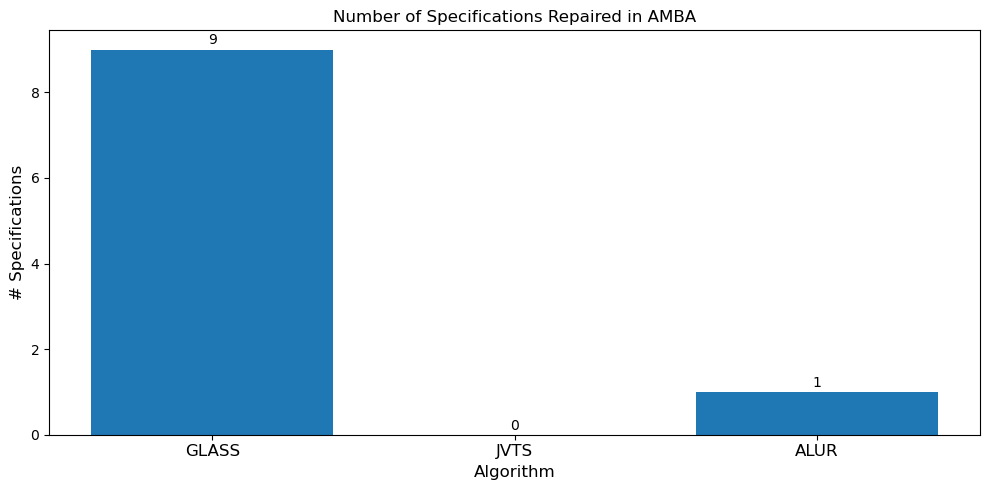

In [18]:
plot_num_spec_repaired("inputs/AMBA")